<a href="https://colab.research.google.com/github/Kalpesh-Nandedkar/Netflix-Movies-and-TV-Shows-Clustering/blob/main/Netflix_Movies_%26_TV_Shows_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -   
$\color{red}{\text{NETFLIX MOVIES AND TV SHOWS CLUSTERING}}$

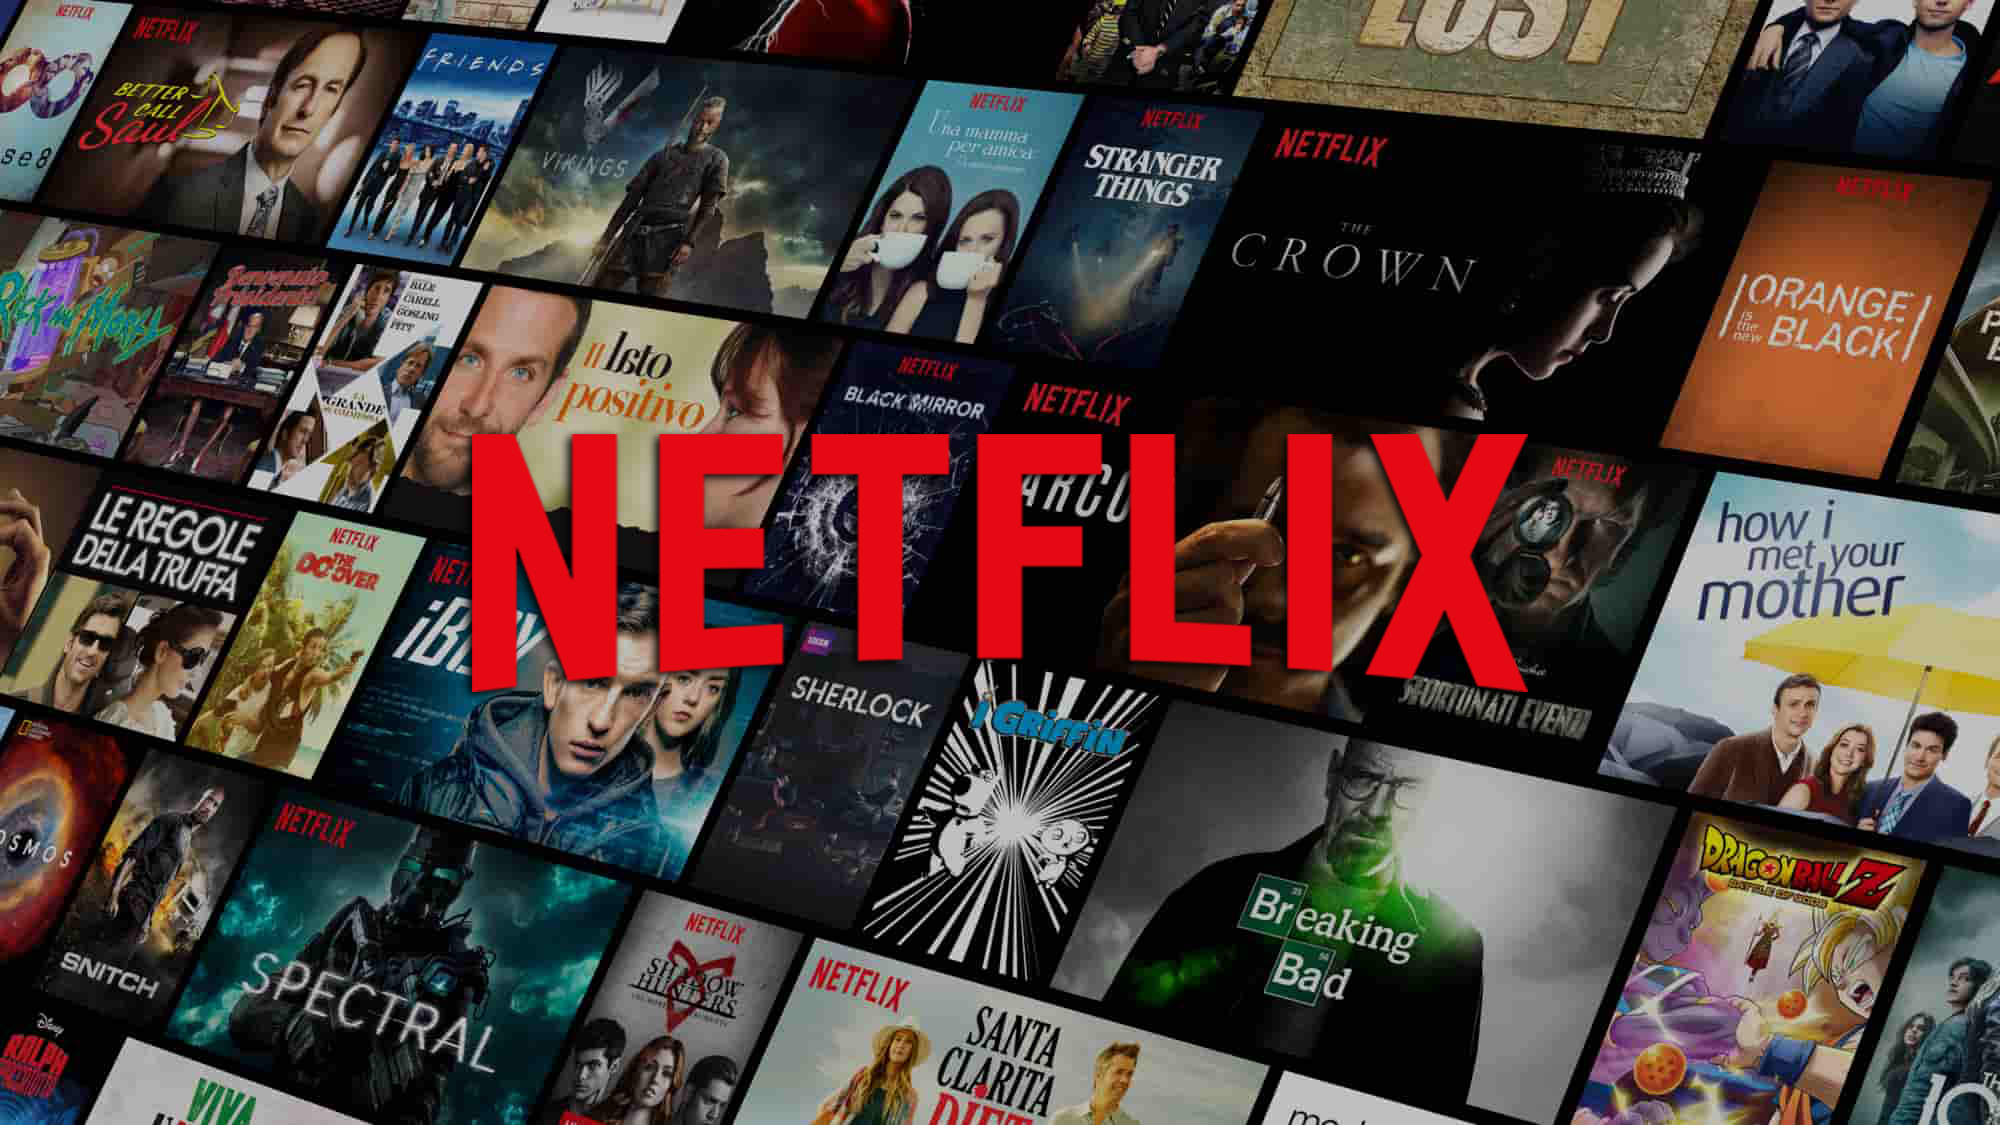

##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual/Team
##### **Name**            - Kalpesh Nandedkar

# **Project Summary -**

The Data set used in the project consists of Movies and TV shows available on Netflix as surveyed by Flixable, 3rd party Netflix search engine.The project has successfully analysed data set containing 7787 rows and 12 columns, with no duplicates. The data contained 69.1% movies and 30.9% TV shows, with the number of movies added each year falling since 2019. The USA, India, and the UK were the countries producing the most content on Netflix, and international movies, dramas, and comedies were the most common genres. Most content was rated as mature, followed by teen and family-friendly.

Further, dimensionality reduction has been performed using PCA. KMeans and Heirarchical Clustering have been used to cluster the data based on the textual fields in the data set. As per KMeans, 4 optimum clusters were created while Heirarchical clusteriing with threshold distance of 4 units created 9 clusters. Finally, a recommnedation system has been built using Cosine Similarity to provide top 10 similar content.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**To provide various insights and cluster similar content from the data set collected by Flixable which is a third-party Netflix search engine.**

**Attribute Information**
* show_id : Unique ID for every Movie / Tv Show
* type : Identifier - A Movie or TV Show
* title : Title of the Movie / Tv Show
* director : Director of the Movie
* cast : Actors involved in the movie / show
* country : Country where the movie / show was produced
* date_added : Date it was added on Netflix
* release_year : Actual Releaseyear of the movie / show
* rating : TV Rating of the movie / show
* duration : Total Duration - in minutes or number of seasons
* listed_in : Genere
* description: The Summary description

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [2]:
#installing yellowbrick library
!pip install yellowbrick

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# Import Libraries
# Importing important libraries
# Tables and Data manipulations
import pandas as pd
import numpy as np
from numpy import *

# Plotting & Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pylab as pl
import plotly.express as px
import plotly.graph_objects as go
from matplotlib.backend_bases import rcParams

# for rescaling the data
from sklearn.preprocessing import MinMaxScaler

# To disable the display of all warning messages.
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(style='darkgrid', palette='mako')

#for recognition of a named entity
import nltk
nltk.download('all', quiet=True)
from nltk import ne_chunk

from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE

# stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer, LancasterStemmer, SnowballStemmer, WordNetLemmatizer
STOPWORDS= set(stopwords.words('english'))

# Vectorizer and DTM
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD

# Clustering
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.sparse import csr_matrix

from yellowbrick.cluster import KElbowVisualizer

from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score, silhouette_samples
from yellowbrick.cluster.silhouette import silhouette_visualizer

# Kernel
from sklearn.metrics.pairwise import linear_kernel

# word cloud essentials
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Cosine similarity calculation
from sklearn.metrics.pairwise import cosine_similarity

#Heirarchical Clustering
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import squareform, pdist
from scipy.cluster.hierarchy import dendrogram, linkage

#Import Silhouette Score metric for chosing the best clustering model
from sklearn.metrics import silhouette_score

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Dataset Loading

In [4]:
# MOunting Google drive for data loading
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Load Dataset
Netflix_dataset = pd.read_csv("/content/drive/MyDrive/AlmaBetter/Capstone Project/Capstone Project Unsupervised ML - Clustering/Netflix Movies and TV Shows Clustering/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")

In [6]:
# copying the data for further analysis
df = Netflix_dataset.copy()

### Dataset First View

In [7]:
# Dataset First Look
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Dataset Rows & Columns count

In [9]:
# Dataset Rows & Columns count
df.shape

(7787, 12)

### Dataset Information

In [11]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [14]:
# Dataset Duplicate Value Count
print(f'there are {sum(df.duplicated())} duplicates in the data set')

there are 0 duplicates in the data set


#### Missing Values/Null Values

In [15]:
# Missing Values/Null Values Count
# checking missing values
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

Text(0.5, 1.0, ' Visualising Missing Values')

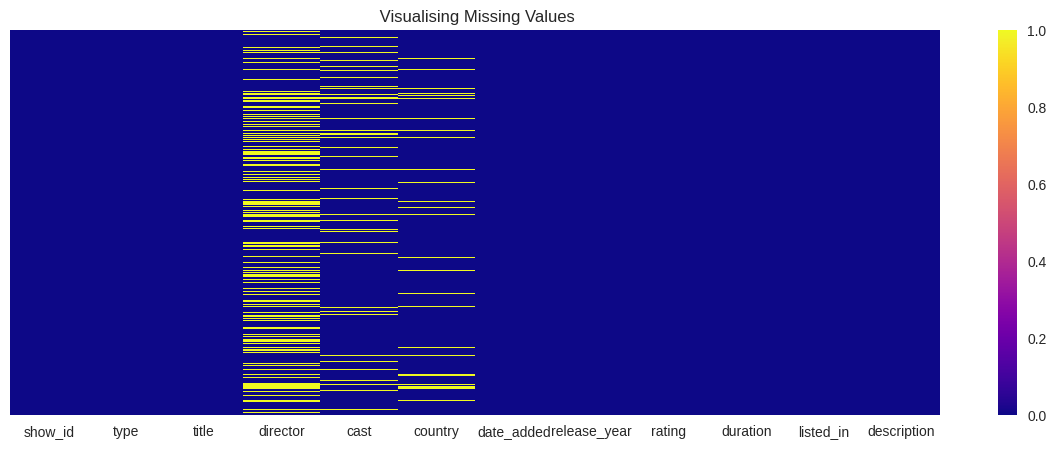

In [16]:
# Visualizing the missing values
plt.figure(figsize=(15,5))
sns.heatmap(df.isnull(),cmap='plasma',annot=False,yticklabels=False)
plt.title(" Visualising Missing Values")

### What did you know about your dataset?

From the above process it is clear that:


*   Data set consists of 7787 rows and 12 columns.
*   All the features in the data set are object type except release_year which is int64.
*   There are no duplicate entries in the data set.
*   3 features contain null values with director feature having highest number of null values for 2389 entries.

## ***2. Understanding Your Variables***

In [17]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [20]:
# Dataset Describe
df.describe(include = 'all').style.background_gradient()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,nan,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",nan,TV-MA,1 Season,Documentaries,"Multiple women report their husbands as missing but when it appears they are looking for the same man, a police officer traces their cryptic connection."
freq,1,5377,1,18,18,2555,118,nan,2863,1608,334,3
mean,nan,nan,nan,nan,nan,nan,nan,2013.932580,nan,nan,nan,nan
std,nan,nan,nan,nan,nan,nan,nan,8.757395,nan,nan,nan,nan
min,nan,nan,nan,nan,nan,nan,nan,1925.000000,nan,nan,nan,nan
25%,nan,nan,nan,nan,nan,nan,nan,2013.000000,nan,nan,nan,nan
50%,nan,nan,nan,nan,nan,nan,nan,2017.000000,nan,nan,nan,nan
75%,nan,nan,nan,nan,nan,nan,nan,2018.000000,nan,nan,nan,nan


### Variables Description 

1.   show_id: Unique IO for every Movie / Tv Show
2.   type: Identifier - A Movie or TV Show
3.   title: Title Of the movie/show
4.   director: Director of the show
5.   cast: Actors involved
6.   country: Country of production
7.   date_added: Date it was added on Netflix
8.   release-year: Actual release year Of the Show
9.   rating: TV rating of the show
10.  duration: Total duration in minutes or number of
seasons
11.  listed-in: Genre
12.  Description: The summary description

### Check Unique Values for each variable.

In [21]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in",i,"is",df[i].nunique())

No. of unique values in show_id is 7787
No. of unique values in type is 2
No. of unique values in title is 7787
No. of unique values in director is 4049
No. of unique values in cast is 6831
No. of unique values in country is 681
No. of unique values in date_added is 1565
No. of unique values in release_year is 73
No. of unique values in rating is 14
No. of unique values in duration is 216
No. of unique values in listed_in is 492
No. of unique values in description is 7769


## 3. ***Data Wrangling***

### Data Wrangling Code

In [22]:
# creating a function to get df along with datatype , missing value no , unique values no , first value , second value

def DataInfoAll(df):
    print(f"Dataset Shape: {df.shape}")
    print("-"*75)
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.iloc[0].values
    summary['Second Value'] = df.iloc[1].values
    return summary

In [23]:
# Checking all the observation of the dataset we have to deal with.
DataInfoAll(df)

Dataset Shape: (7787, 12)
---------------------------------------------------------------------------


,Name,dtypes,Missing,Uniques,First Value,Second Value
0,show_id,object,0,7787,s1,s2
1,type,object,0,2,TV Show,Movie
2,title,object,0,7787,3%,7:19
3,director,object,2389,4049,NaN,Jorge Michel Grau
4,cast,object,718,6831,"João Miguel, Bianca Comparato, Michel Gomes, R...","Demián Bichir, Héctor Bonilla, Oscar Serrano, ..."
5,country,object,507,681,Brazil,Mexico
6,date_added,object,10,1565,"August 14, 2020","December 23, 2016"
7,release_year,int64,0,73,2020,2016
8,rating,object,7,14,TV-MA,TV-MA
9,duration,object,0,216,4 Seasons,93 min


In [24]:
# Write your code to make your dataset analysis ready.
# The missing values in the 'director', 'cast', and 'country' columns can be replaced with the label 'Unknown'.
df[['director']] = df[['director']].fillna('Unknown')
df[['cast']]     = df[['cast']].fillna('Unknown')
df[['country'] ] = df[['country']].fillna('Unknown')

In [25]:
# 2. Drop null values in date_added and rating
df.dropna(subset=['date_added','rating'], inplace=True)

In [26]:
#checking the number of null values in the data set again
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [27]:
#converting the date_added column into datetime format
df['date_added']=pd.to_datetime(df['date_added'])

In [28]:
#extratcting day, month and year of addition
df['day_added']= df['date_added'].dt.day
df['month_added']= df['date_added'].dt.month
df['year_added']= df['date_added'].dt.year

In [29]:
#checking the new columns
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,month_added,year_added
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,14,8,2020
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,23,12,2016
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",20,12,2018
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",16,11,2017
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,1,1,2020


In [30]:
#Getting the unique values in ratings column
df['rating'].unique().tolist()

['TV-MA',
 'R',
 'PG-13',
 'TV-14',
 'TV-PG',
 'NR',
 'TV-G',
 'TV-Y',
 'TV-Y7',
 'PG',
 'G',
 'NC-17',
 'TV-Y7-FV',
 'UR']

The codes are as per the Netflix ratings system which is likeley to have been adapted from Motion Pictures Association(MPA) in USA. We can use the following understandable one word instead of the jagrons used above.

'TV-MA': Mature

'R': Restricted

'PG-13': ParentalGuidance13

'TV-14': 'Teen'

'TV-PG': 'Family-friendly'

'NR': NotRated

'TV-G': 'General',

'TV-Y': 'Children'

'TV-Y7': 'Youth'

'PG': ParentalGuidance

'G': General

'NC-17': AdultsOnly

'TV-Y7-FV': TVY7FantasyViolence

'UR': Unrated

In [31]:
#encoding the same in the ratings column
nomenclature={
    'TV-MA': 'Mature',
    'R': 'Restricted',
    'PG-13': 'ParentalGuidance13',
    'TV-14': 'Teen',
    'TV-PG': 'Family-friendly',
    'NR': 'NotRated',
    'TV-G': 'General',
    'TV-Y': 'Children',
    'TV-Y7': 'Youth',
    'PG': 'Parental Guidance',
    'G': 'General',
    'NC-17': 'Adults Only',
    'TV-Y7-FV': 'Fantasy Violence',
    'UR': 'Unrated'}

df['audience']=df['rating'].replace(nomenclature)

In [32]:
#checking for the changes in the dataset
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,month_added,year_added,audience
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,14,8,2020,Mature
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,23,12,2016,Mature
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",20,12,2018,Restricted
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",16,11,2017,ParentalGuidance13
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,1,1,2020,ParentalGuidance13


### What all manipulations have you done and insights you found?

1. Null values in director, cast, country have been replaced with the 'Unknown' as we don't know the names & so we do not unbalanced the data we kept with unknown
2. Entries with null values in column date_added and rating have been dropped since these entries are small in number
3. date_added column has been converted to datetime format from object64 format. Further, date_added, month_added and year_added columns have been created for better insights.
4. Ratings have been converted to more understable formats from Netflix standards which is likely to have been adapted from MPA.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1  
#### **Type of Content on Netflix**

In [33]:
# Chart - 1 visualization code
# Create a pie chart for Type.
colors = ['	#db0000', '	#564d4d']
labels = ['Tv Show', 'Movie']
tv_show = df.type.value_counts()[1]
movie = df.type.value_counts()[0]

fig = go.Figure(data=[go.Pie(labels=labels, values=[tv_show, movie], hole=.6)])
fig.update_layout(
    title_text="Type of content watched on Netflix",title_x=0.5, legend=dict(x=0.9),height=500, width=500,
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Type of content.', font_size=20, showarrow=False)])
fig.update_traces(marker=dict(colors=colors))

fig.show()

##### 1. Why did you pick the specific chart?

* To show what type of content are produced on Netflix.

##### 2. What is/are the insight(s) found from the chart?

* 69.1% of the content available on Netflix are movies and the remaining 30.9% are TV Shows

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* It can be concluded that much of the content on Netflix is movies. Further, proven the demand for higher number of movies on the platform, it is important for the platform to focus on acquiring more of the movies for their audience to watch.

#### Chart - 2

Text(0.5, 1.0, 'Year wise trend of content added')

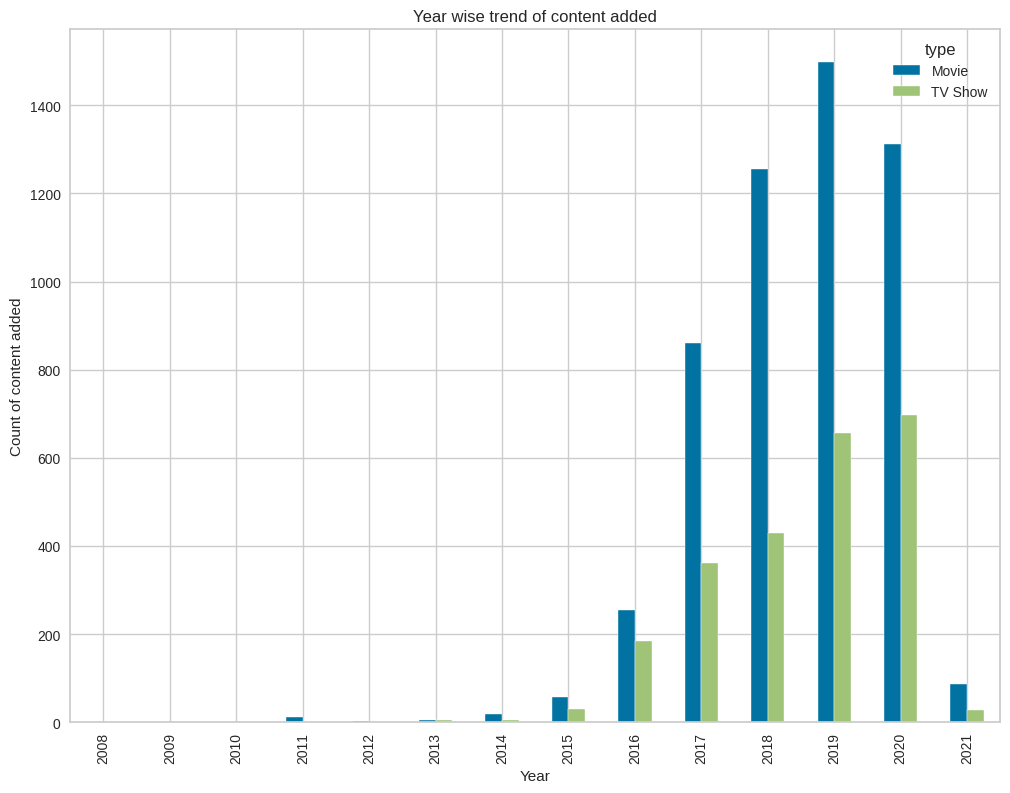

In [34]:
# Chart - 2 Year wise trend of content added
plt.rcParams['figure.figsize']= (12,9)  
#group the data by year and type, reset the index to count
group= df.groupby(['year_added', 'type']).size().reset_index(name='count')

#create seperate column for each type
group1= group.pivot(index='year_added', columns= 'type', values='count')

#create the plot
ax= group1.plot(kind='bar')
ax.set_xlabel('Year')
ax.set_ylabel('Count of content added')
ax.set_title('Year wise trend of content added')

##### 1. Why did you pick the specific chart?

* Bar chart was chosen specifically to understand the the growth and trend with respect to the content being added to Netflix platform.

##### 2. What is/are the insight(s) found from the chart?

* It can be clearly seen that there was an exponential growth with respect to the number of Movies and TV Shows being added to the platform starting during the year 2014. However, it to be noted that number of TV Shows added are steadily rising while number of movies added each year has fallen from 2019 onwards.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

1. It can be identified that demand for Tv shows is steadily growing and sufficient resources need to be allocated for development or acquiring the Tv Shows.
2. This insight also helps the firm being on the top among the competition.
3. The boom is likely caused due to covid outbreak and internet not being a costly affair to the public anymore.
4. Similarly, Demand for movies is significantly high while compared to TV shows however, the demand has declined slighlty compared 2019 which was the year of Covid outbreak

#### Chart - 3
##**Number of movies released during past 10 years**

In [35]:
# checking the number of unique years when movies were released
df['release_year'].nunique()

73

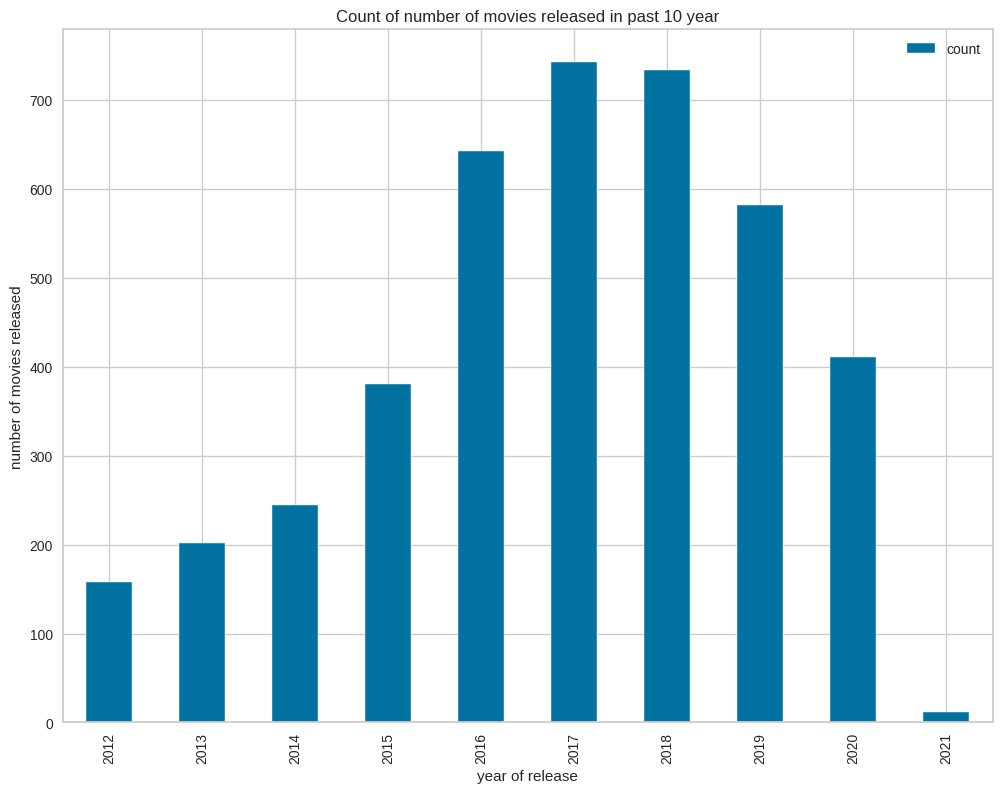

In [36]:
# Chart - 3 Number of movies released during past 10 years
movies= df[df['type']=='Movie']

movies_trend= movies.groupby('release_year').size().reset_index(name='count')
only_last_10= movies_trend.tail(10)

ax= only_last_10.plot(kind='bar', x= 'release_year', y= 'count')
ax.set_xlabel('year of release')
ax.set_ylabel('number of movies released')
ax.set_title('Count of number of movies released in past 10 year')
plt.show()

##### 1. Why did you pick the specific chart?

* The bar chart has been chosen in order to understand the trend in number of movies being released each year during the past 10 years. (as on the last date of collection of data)

##### 2. What is/are the insight(s) found from the chart?

* It can be observed that number of movies released each year has grown drastically from 2012 to till 2017. However, after 2017 it can be observed that number of movies released each year has declined.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

There could be two mainly possible reasons for thee decline in the number of movies being released each year:

1. The interest of the audience has shifted from watching movies to TV shows which could be due to several reasons. This can be further verified on inspecting the number of TV Shows released each year.
2. Covid outbreak may also be another reason as we can see a significant decline in number of movies being released from 2019 onwards

#### Chart - 4
##**Number of TV shows released during past 10 years**

Text(0.5, 1.0, 'Number of TV shows released during past 10 years')

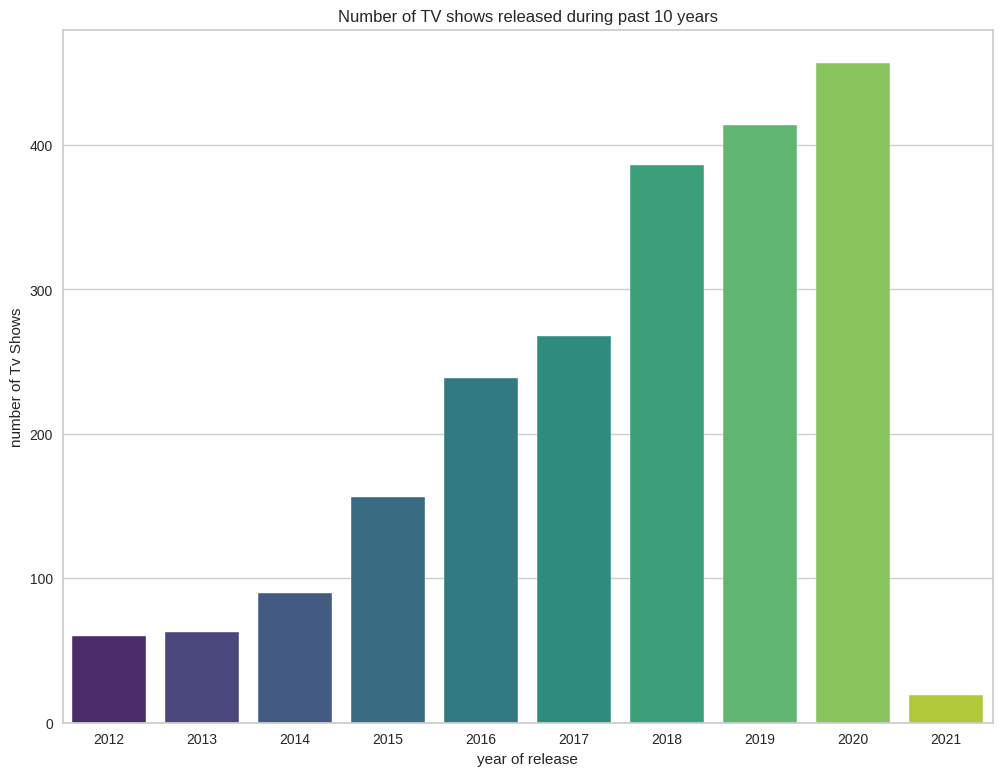

In [37]:
# Chart - 4 
tv_show= df[df['type']=='TV Show']

show_trend= tv_show.groupby('release_year').size().reset_index(name='count')
last_10= show_trend.tail(10)

sns.barplot(data= last_10, x= 'release_year', y='count', palette='viridis')
plt.xlabel('year of release')
plt.ylabel('number of Tv Shows')
plt.title('Number of TV shows released during past 10 years')

##### 1. Why did you pick the specific chart?

* It can be seen that there is a rapid growth in the number of TV Shows released each year from the above graph.

##### 2. What is/are the insight(s) found from the chart?

* Number of TV Shows released each year is growing significantly.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* The main inference that can be drawn from the above graph is the growth pace of Tv shows. As copmared to movies which are released lesser each year after 2017, TV Shows are increasing in number. Hence, it can be noted that number of customers watching TV shows is growing each year as compared to number of people watching movies. Thus, it is important for the platform to buy as many quality TV shows as possible while buying only extremely potent movies.

#### Chart - 5
## **Month wise distribution of content added**

Text(0.5, 1.0, 'month wise distribution of content added')

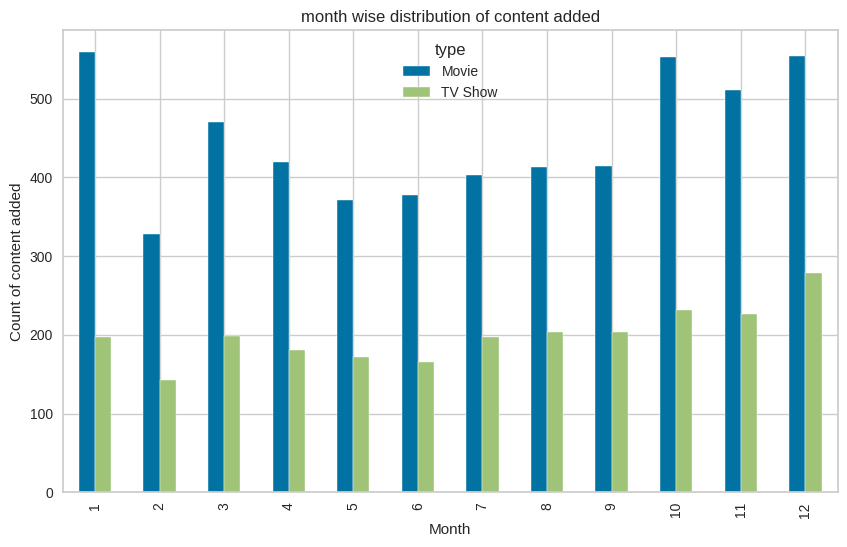

In [38]:
# Chart - 5
plt.rcParams['figure.figsize']= (10,6) 
# calculating the number of shows released in each month
monthly= df.groupby(['month_added', 'type']).size().reset_index(name='count')

#create seperate column for each type in the graph
monthly_sep= monthly.pivot(index='month_added', columns= 'type', values='count')

#create the plot
rcParams
ax= monthly_sep.plot(kind='bar')
ax.set_xlabel('Month')
ax.set_ylabel('Count of content added')
ax.set_title('month wise distribution of content added')

##### 1. Why did you pick the specific chart?

* Bar chart has been chosen as the appropriate chart since it is easily understandable and suffivient enough to visualize the distribution of the underlying month wise distribution

##### 2. What is/are the insight(s) found from the chart?

* It is evident that most of the content is added during January, October, November and December

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* Since most content is onboarded during the above mentioned months in the industry, it is appropriate to have surplus budget during these months primarily meant for purchase of TV Shows and Movies, while during the rest of the months, budget can be allocated more to other operations.

#### Chart - 6
## **Rating wise distribution of the content of netflix shows**

In [42]:
# Chart - 6 visualization code
#rating column distribution by plotly
fig_donut = px.pie(df, names='rating', height=700, width=700, hole=0.7,

title='MOST OF PROGRAMME ON NETFLIX IS TV-14 & TV-MA RATED',

color_discrete_sequence=['#b20710', '#221f1f'])

fig_donut.update_traces(hovertemplate=None, textposition='outside',

textinfo='percent+label', rotation=90)

fig_donut.update_layout(margin=dict(t=80, b=10, l=0, r=0), showlegend=False,

plot_bgcolor='#333', paper_bgcolor='#333',

title_font=dict(size=25, color='#8a8d93', family="Lato, sans-serif"),

font=dict(size=17, color='#8a8d93'),

hoverlabel=dict(bgcolor="#444", font_size=13,

font_family="Lato, sans-serif"))
fig_donut.show(renderer='colab')

##### 1. Why did you pick the specific chart?

* It is easy to understand the Rating wise distribution of the content on netflix using Pie chart.

##### 2. What is/are the insight(s) found from the chart?

* It can be seen that most contnent on Netflix is rated for Mature followed by Teen and Family friendly.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* Most of the content is rated for Mature category, making them the largest target audience. Similarly 2nd largest target audience are teens. It is more appropriate to continue allocating more budget to these categories as they serve the major chunk of the customers.

#### Chart - 7
## **Directors**

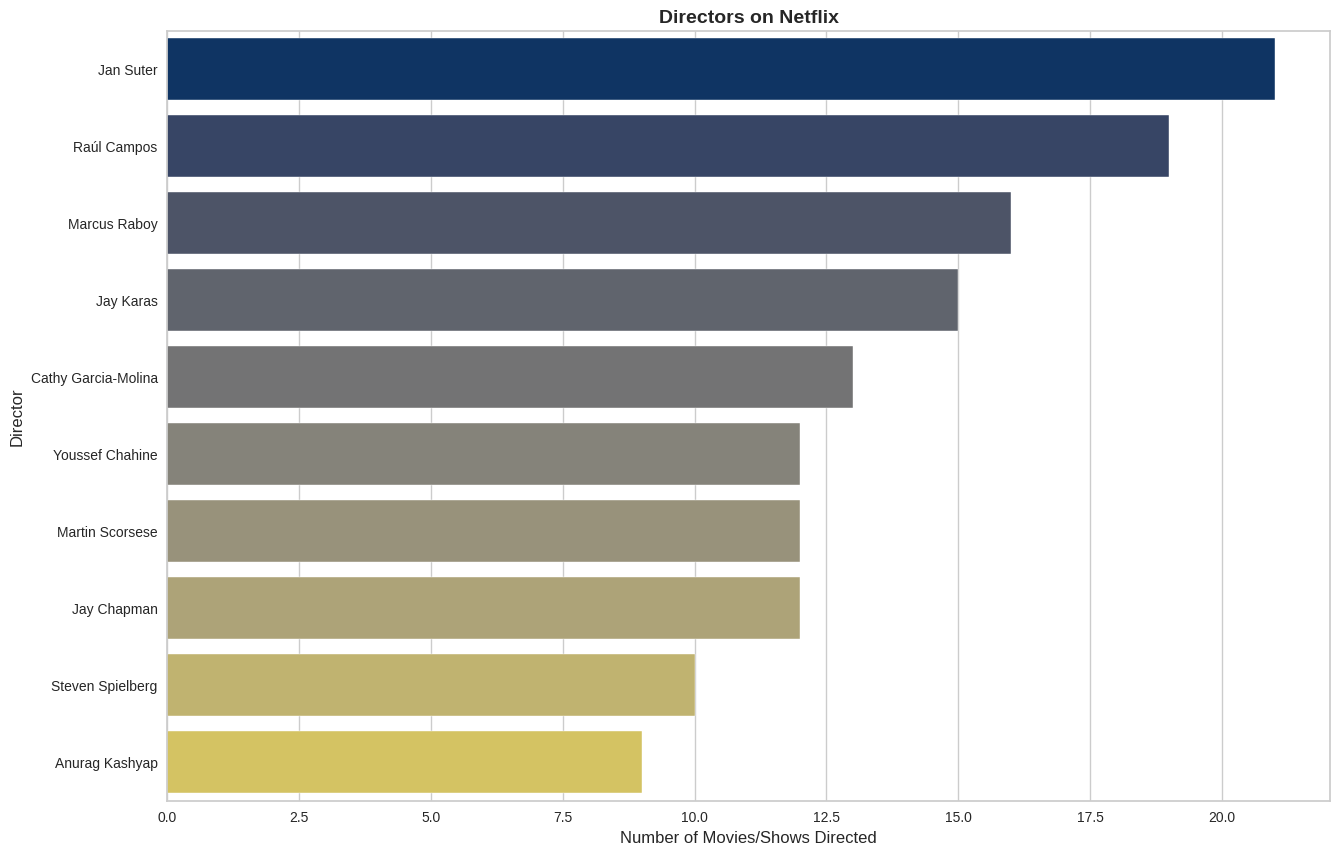

In [44]:
# Chart - 7 visualization code
a=df[df.director != 'Unknown'].loc[:,['show_id','title','director', 'cast']].copy()
director = (a['director'].to_list())

newlist = []
for genre in director:
  if ',' in genre:
    a = genre.split(', ')
    newlist = newlist + a
  else:
    newlist.append(genre)
country_list = pd.DataFrame({'Director' : newlist, 'show_id':np.arange(0,len(newlist),1)})
a = country_list.groupby('Director').agg({'show_id':'count'}).sort_values('show_id', ascending= False).reset_index().head(10)
plt.figure(figsize=(15,10))
a = sns.barplot(y = 'Director', x = 'show_id',data = a , palette= 'cividis')
a = plt.title('Directors on Netflix',fontsize = 14, fontweight='bold')
a = plt.ylabel('Director',fontsize = 12)
a = plt.xlabel('Number of Movies/Shows Directed',fontsize = 12)
top10directors = country_list.groupby('Director').agg({'show_id':'count'}).sort_values('show_id', ascending= False).reset_index().head(10)['Director'].to_list

##### 1. Why did you pick the specific chart?

* To show Top 10 Directors

##### 2. What is/are the insight(s) found from the chart?

Top 3 Directors are-

1.   **Jan Suter**
2.   **Raul Campos**
3.   **Marcus Raboy**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes It will give an insight which director has directed most number of Movies/TV shows.

#### Chart - 8
## **Top 10 Actors**

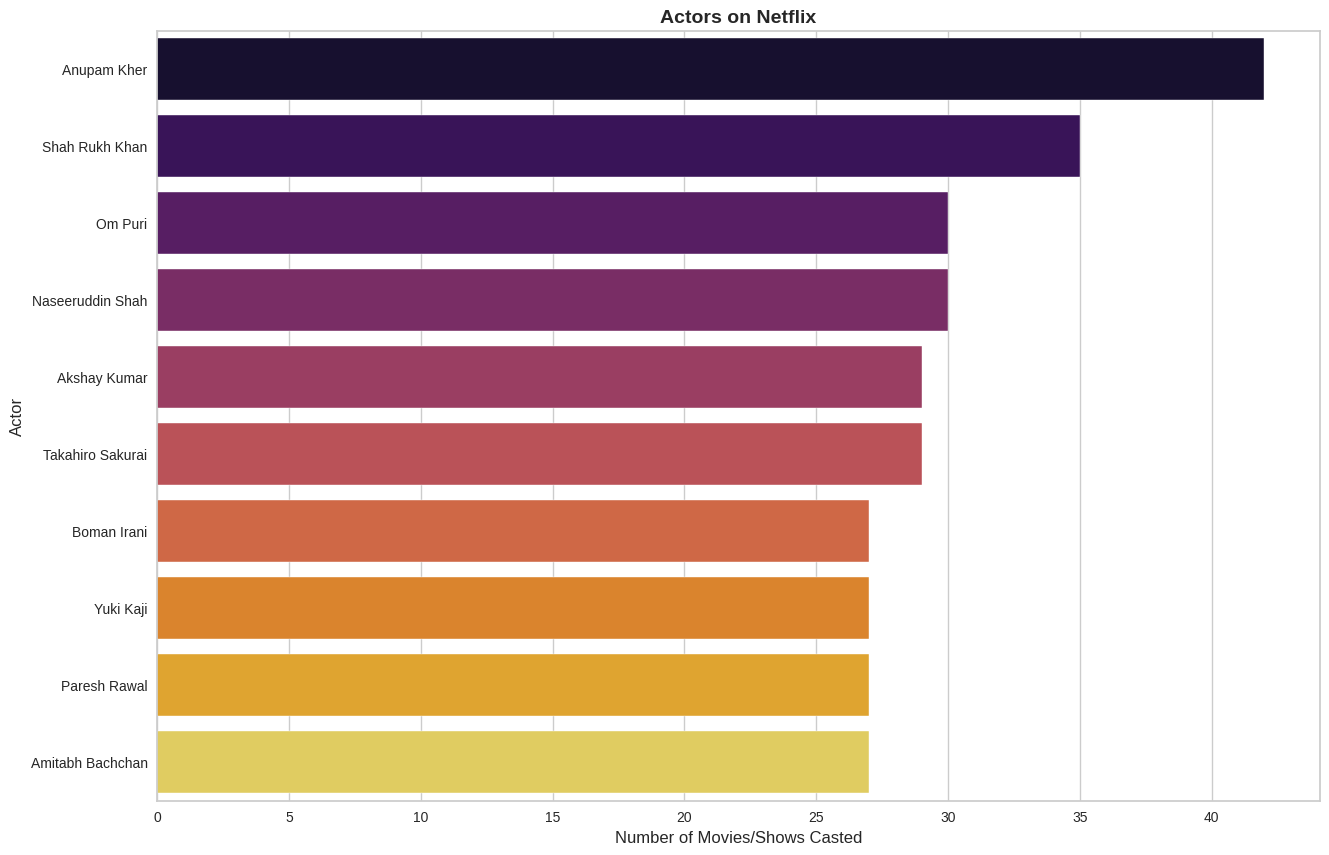

In [45]:
# Chart - 8 visualization code
a=df[df.cast != 'Unknown'].loc[:,['show_id','title','director', 'cast']].copy()
cast = (a['cast'].to_list())

newlist = []
for genre in cast:
  if ',' in genre:
    a = genre.split(', ')
    newlist = newlist + a
  else:
    newlist.append(genre)
country_list = pd.DataFrame({'Actor' : newlist, 'show_id':np.arange(0,len(newlist),1)})
a = country_list.groupby('Actor').agg({'show_id':'count'}).sort_values('show_id', ascending= False).head(10).reset_index()
plt.figure(figsize=(15,10))
a = sns.barplot(y = 'Actor', x = 'show_id',data = a , palette= 'inferno')
a = plt.title('Actors on Netflix',fontsize = 14, fontweight='bold')
a = plt.ylabel('Actor',fontsize = 12)
a = plt.xlabel('Number of Movies/Shows Casted',fontsize = 12)
top10actors = country_list.groupby('Actor').agg({'show_id':'count'}).sort_values('show_id', ascending= False).head(20).reset_index()['Actor'].to_list()

##### 1. Why did you pick the specific chart?

* To show Top 10 Actors

##### 2. What is/are the insight(s) found from the chart?

Top 3 Actors are

1.   **Anupam Kher**
2.   **Shah Rukh Khan**
3.   **Om Puri**


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes It will give an insight which Actor has been casted most number of times.

#### Chart - 9
## **Genre wise distribution**

Text(0.5, 1.0, 'Top 10 genres on Netflix')

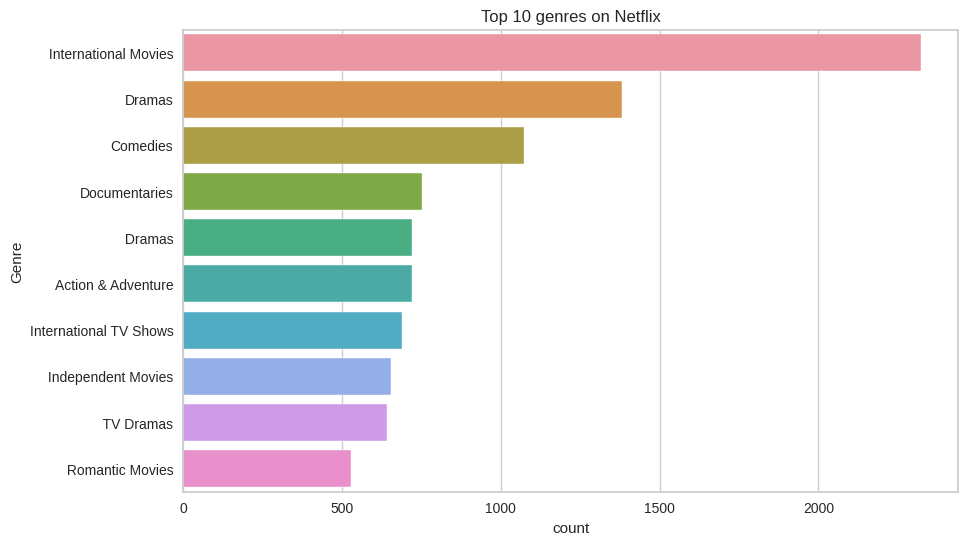

In [46]:
# Chart - 9 visualization code
# Genre wise distribution
genres= df.set_index('title').listed_in.str.split(',', expand=True).stack().reset_index(level=1, drop=True)
sns.countplot(y = genres, order=genres.value_counts().index[:10])
plt.xlabel('count')
plt.ylabel('Genre')
plt.title("Top 10 genres on Netflix")

##### 1. Why did you pick the specific chart?

* Countplot has been chosen since it is efficient in ploting the categorical distribution.

##### 2. What is/are the insight(s) found from the chart?

* It is found that international movies, followed by Drama and Comedies genre top the content on Netflix.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* More resource can be allocated towards acquiring International Movies, Drama and comedy content followed by other genres since these form the top 3 genres on Netflix

#### Chart - 10
## **Duration of Movies**

<Figure size 800x800 with 0 Axes>

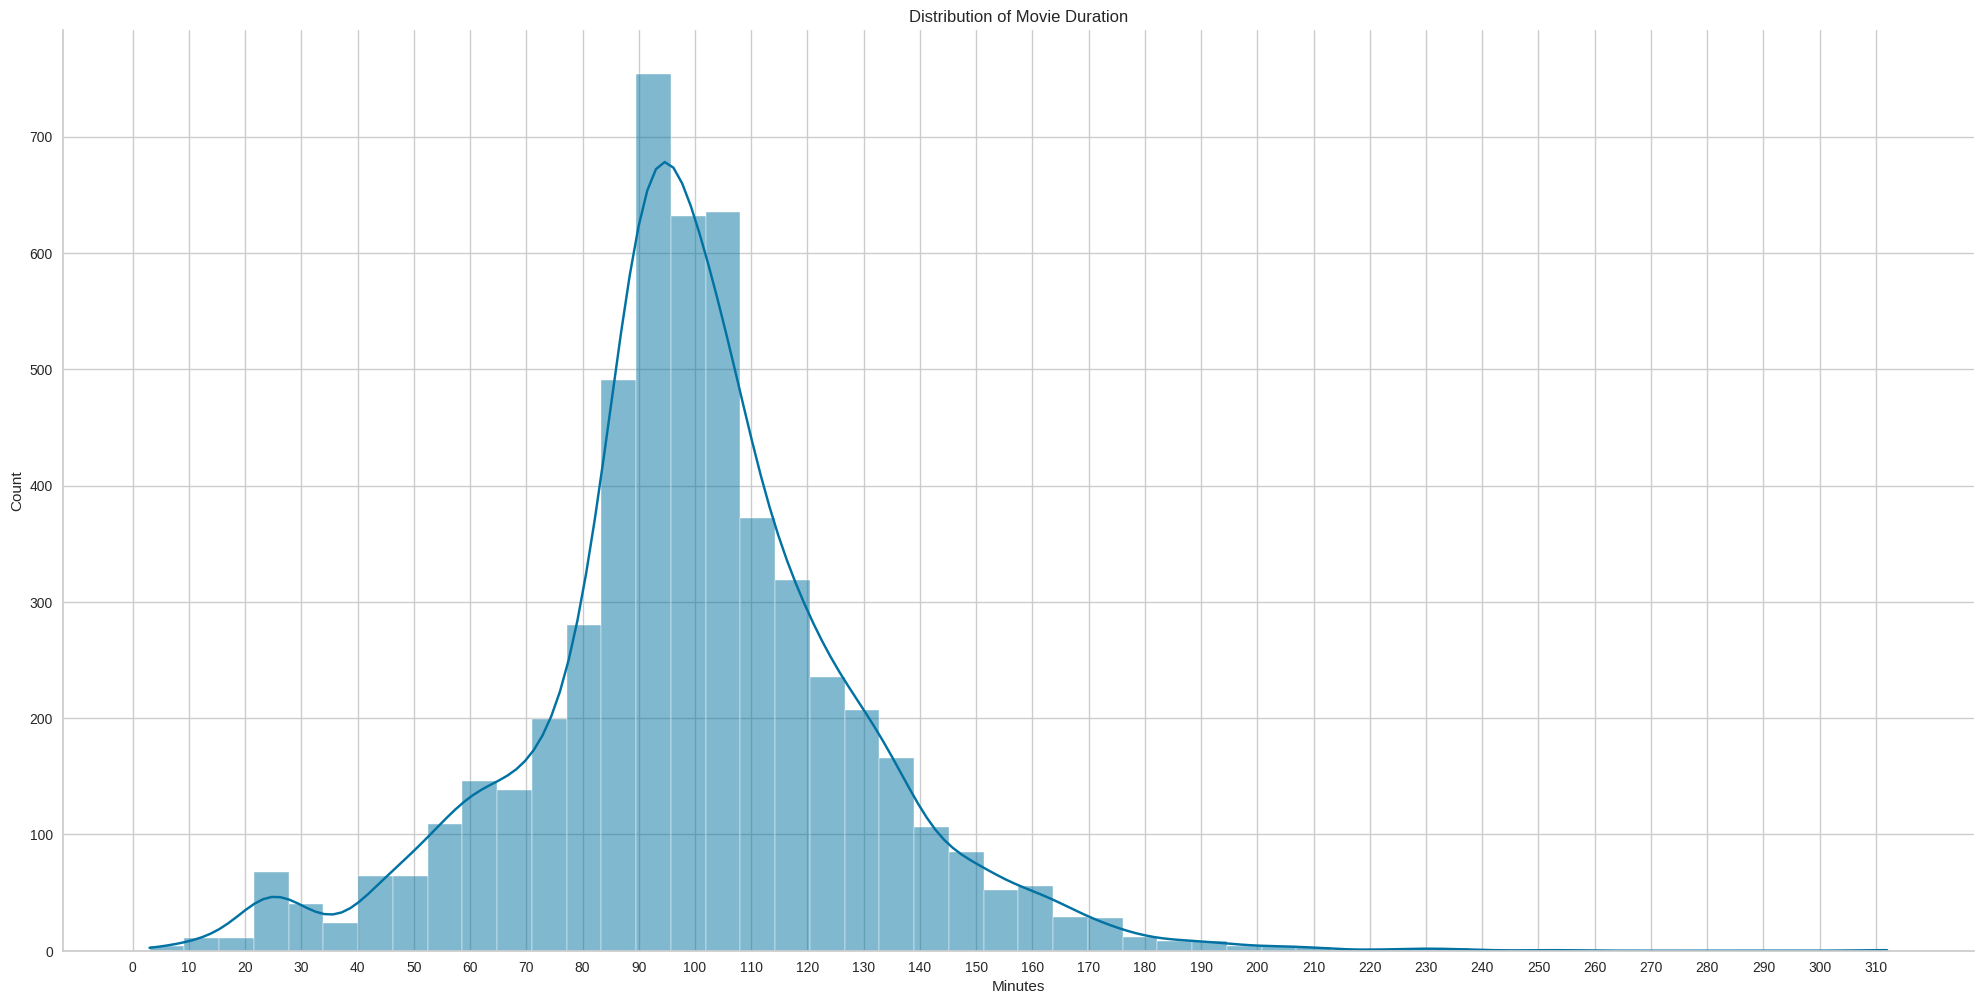

In [47]:
# Chart - 10 visualization code
a=df[df['type']=='Movie'].loc[:,['show_id','title','duration']].copy()
duration = (a['duration'].to_list())

duration_list = []
for duration in duration:
  duration_list.append(int(duration.split(' ')[0]))
duration_list = pd.DataFrame({'Duration' : duration_list, 'show_id':np.arange(0,len(duration_list),1)})
plt.figure(figsize=(8,8))
a = sns.displot(x= 'Duration',  data = duration_list, kind = 'hist', height=10, aspect=2, bins = 50,kde=True)
a = plt.title('Distribution of Movie Duration')
a = plt.xlabel('Minutes')
a = plt.xticks(ticks = np.arange(0,duration_list.Duration.max()+1,10))

##### 1. Why did you pick the specific chart?

* To show the duration of movies on the platform

##### 2. What is/are the insight(s) found from the chart?

* Most movies on Netflix have a duration range from 80 to 120 minutes

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* It is thus clear that most viewed content duration is about 100 minutes. Hence, producing content with duration ranging between 80 to 100 minutes will be a wiser decision.

#### Chart - 11
## **Duration of TV Shows**

In [48]:
#creating data set that contains TV Shows only
tv_shows= df[df['type']=='TV Show']
#checking for duration values
tv_shows['duration'].unique()

array(['4 Seasons', '1 Season', '2 Seasons', '3 Seasons', '5 Seasons',
       '9 Seasons', '8 Seasons', '6 Seasons', '11 Seasons', '7 Seasons',
       '13 Seasons', '12 Seasons', '10 Seasons', '16 Seasons',
       '15 Seasons'], dtype=object)

### Hence, it is clear that TV shows have seasons as their units of duration.

In [49]:
#replace Season or Seasons with blank using regex
tv_shows['duration'] = tv_shows['duration'].str.replace('Seasons?','', regex=True).str.strip()

#Converting the to int64 datatype from object64
tv_shows['duration']= tv_shows['duration'].astype(int64)

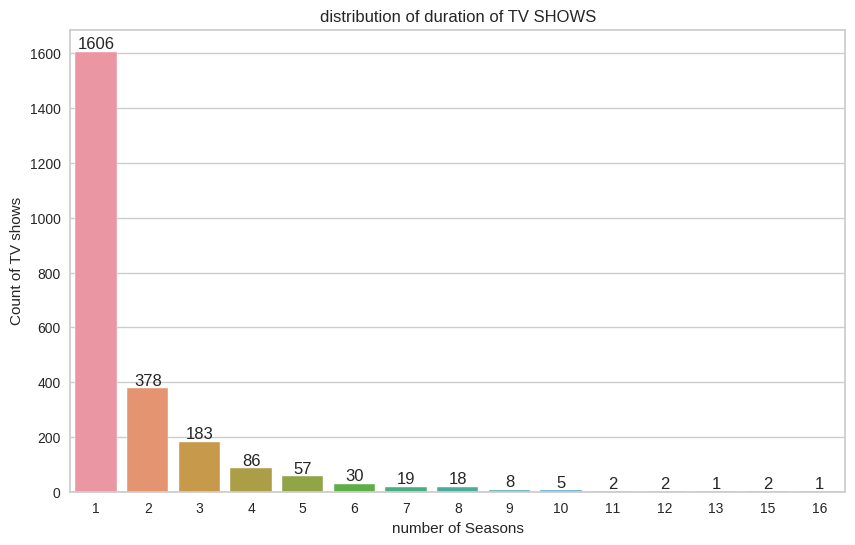

In [50]:
# Chart - 11 visualization code
#creating the bar plot
season_wise= tv_shows.groupby('duration').size().reset_index(name='count').sort_values(by='duration', ascending=False)
ax=sns.barplot(data=season_wise, x= 'duration', y='count', orient='v')
plt.xlabel('number of Seasons')
plt.ylabel('Count of TV shows')
plt.title('distribution of duration of TV SHOWS')

# Annotate the bars with their count values
for i, v in enumerate(season_wise['count'][::-1]):
    ax.text(i, v, str(v), ha='center', va='bottom')
plt.show()

##### 1. Why did you pick the specific chart?

* Bar plot was chosen as it is ideal to represent the category wise count in a data set.

##### 2. What is/are the insight(s) found from the chart?

* Thus, it is clear that most of the TV shows(1606) are of single season while 378 are of two seasons. It is to be noted that there are TV shows with 16 seasons.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* A critical thing to note here is that Netflix needs to give significantly more importance in production or acquiring of TV Shows that span for multiple Seasons. This can be an extremely beneficial strategy for customer retention.

#### Chart - 12
## **Total Content Country wise production**

In [51]:
# all country df
all_countries = df.groupby(['country','type']).count()['show_id'].reset_index()
all_countries.head()

,country,type,show_id
0,Argentina,Movie,34
1,Argentina,TV Show,16
2,"Argentina, Brazil, France, Poland, Germany, De...",Movie,1
3,"Argentina, Chile",Movie,1
4,"Argentina, Chile, Peru",Movie,1


In [52]:
#necessary imports for plotly and map
import pandas as pd
import numpy as np
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.subplots import make_subplots

In [53]:
#country wise content for top countries
country_count = {}
for i in range(len(all_countries)):
    l = all_countries['country'][i].split(', ')
    for x in l:
        x = re.sub('[^A-Za-z0-9 ]+', '', x)
        if x not in country_count.keys():
            country_count[x] = all_countries['show_id'][i]
        else:
            country_count[x] += all_countries['show_id'][i]
country_df = pd.DataFrame(list(zip(country_count.keys(), country_count.values())), columns =['country', 'count']) 

d = country_df.sort_values(by=['count'], ascending=False).head(10)
# .plot.bar(x='country',y='count',edgecolor='black')
fig = px.bar(d, x='country',y='count')
fig.update_traces(marker_color='#221F1F', marker_line_color='#E50914',
                  marker_line_width=2, opacity=1)
fig.update_layout(title='Content produced country wise')
fig.show()
top_30 = country_df.sort_values(by=['count'], ascending=False)['country'].head(30)

## **Content Produced per Country on World Map Visualisation**

In [54]:
# Chart - 12 visualization code
#total content per country
sns.set_theme()
trace = go.Choropleth(
            locations = list(country_count.keys()),
            locationmode='country names',
            z = list(country_count.values()),
            text = country_df['country'],
#             autocolorscale =True,
            reversescale = False,
            zauto = True,
            colorscale = 'RdBu',
            marker = dict(
                line = dict(
                    color = 'rgb(0,0,0)',
                    width = 0.5)
            ),
            colorbar = dict(
                title = 'Total Content',
                tickprefix = '')
        )

data = [trace]
layout = go.Layout(
    title = 'Total content per country',
    geo = dict(
        showframe = True,
        showlakes = False,
        showcoastlines = True,
#         projection = dict(
#             type = 'natural earth'
#         )
    )
)

fig = go.Figure(data=data, layout=layout)
fig.show()

##### 1. Why did you pick the specific chart?

* With bar chart & World map chart it is easier to understand the categorical distribution of data spread throughout the world.

##### 2. What is/are the insight(s) found from the chart?

* It is evident that country producing most number of content for Netflix is USA, followed by India and UK.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* Netflix can consider investing more in these regions for producing more relevant local content as these countries are producing major chunk of the content on the platform

Further, more resource can be allocated towards acquiring quality content from these regions.

#### Chart - 13 
## **Most used word in title of content on Netflix**

In [65]:
#importing the wordcloud
from wordcloud import WordCloud,ImageColorGenerator

There are 144692 words in the combination of all titles.


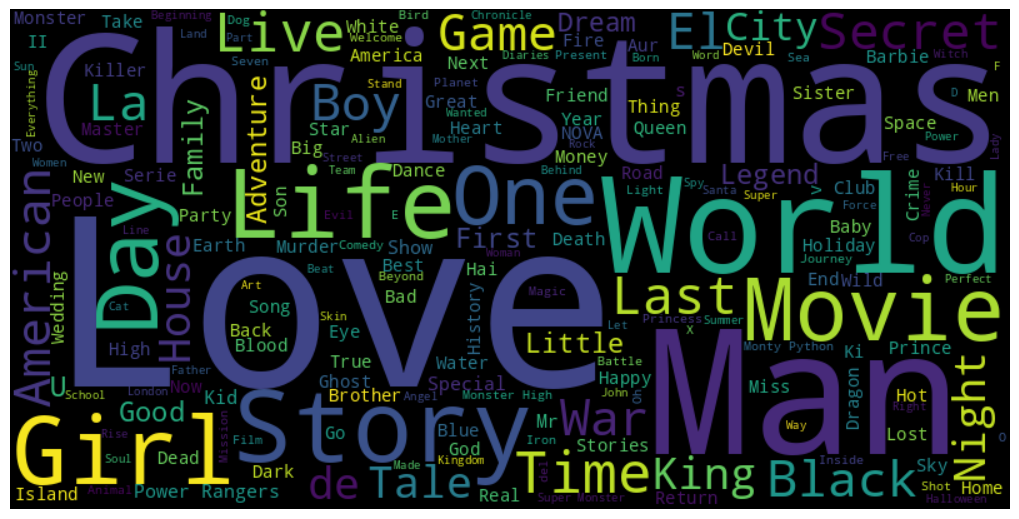

In [66]:
# Chart - 13 visualization code
#chcking word cloud from title column
text = " ".join(topic for topic in df.title.astype(str))
print ("There are {} words in the combination of all titles.".format(len(text)))

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="black", width=800, height=400).generate(text)

plt.axis("off")
plt.rcParams["figure.figsize"] = (14,6)
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

##### 1. Why did you pick the specific chart?

* A word cloud is a technique to show which words are the most frequent in the given text.

##### 2. What is/are the insight(s) found from the chart?

* From above we can say that, Most Title has words like Love, Christmas, Man , World, Life, Girl & So on....

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

1. The average length of movies is same for all countries.
2. Average duration of movies is equal accross all audience ratings
3. Average duration of TV shows is same for all audience rating

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null Hypothesis: The average length of movies is same for all countries.

* Alternate Hypothesis: The average length of movies different between at least two countries

#### 2. Perform an appropriate statistical test.

In [68]:
#function to clean the values
def clean_duration(dataframe):
  '''filters rows with duration in minutes and strips off min from them'''
  dataframe = dataframe[~dataframe['duration'].str.contains('Season|Seasons')]
  dataframe['duration'] = dataframe['duration'].str.replace('min', '').str.strip()
  return dataframe

In [69]:
#create a copy of dataframe for generation of this visualization
dur=df.copy()
#applying the function to clean the column
dur= clean_duration(dur)
# groupby country and mean duration to generate relevant data
country_dur= dur.groupby('country')['duration'].mean().reset_index(name='mean duration')

In [70]:
from scipy.stats import f_oneway

In [71]:
# Perform Statistical Test to obtain P-Value
#ANOVA
# Perform an ANOVA test to check for differences in mean duration between countries
grouped_data_c_d = [group['duration'] for name, group in dur.groupby('country')]
f_statistic, p_value = f_oneway(*grouped_data_c_d)

print("F statistic:", f_statistic)
print("P value:", p_value)


F statistic: 3.986595997903084
P value: 2.0029956029009013e-156


### Thus, Due to high F statistic value and and at 5 percent level of Significance, we can reject null hypothesis and conclude there is significant difference between the average length of the movies in different countries.

##### Which statistical test have you done to obtain P-Value?

* Analysis of Variance(ANOVA)

##### Why did you choose the specific statistical test?

* Since we need to test the difference between the means of two or more groups, ANOVA was chosen.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null Hypothesis: Average duration of movies is equal accross all audience ratings

* Alternate Hypothesis: average duration of movies is not for equal atleast 2 audience ratings

#### 2. Perform an appropriate statistical test.

In [72]:
# Perform Statistical Test to obtain P-Value
#ANOVA
# Perform an ANOVA test to check for differences in mean duration between countries
grouped_data_ratings= [group['duration'] for name, group in dur.groupby('audience')]
f_statistic, p_value = f_oneway(*grouped_data_c_d)

print("F statistic:", f_statistic)
print("P value:", p_value)

F statistic: 3.986595997903084
P value: 2.0029956029009013e-156


### Due to high value of F statistic and P value less than 5 percent level of significance, we reject null hypothesis and conclud that average length of movies is different accross different audience ratings

##### Which statistical test have you done to obtain P-Value?

* Analysis of Variance(ANOVA)

##### Why did you choose the specific statistical test?

* Since we need to test the difference between the means of two or more groups, ANOVA was chosen.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null Hypothesis: Average duration of TV shows is same for all audience rating

* Alternate Hypothesis: Average duration of TV Shows is different for at least 2 categories of audience rating.

#### 2. Perform an appropriate statistical test.

In [73]:
# Perform Statistical Test to obtain P-Value
# Perform an ANOVA test to check for differences in mean duration between countries
grouped_tv_ratings= [group['duration'] for name, group in tv_shows.groupby('audience')]
f_statistic, p_value = f_oneway(*grouped_tv_ratings)

print("F statistic:", f_statistic)
print("P value:", p_value)

F statistic: 2.0141317511852184
P value: 0.041261753580284874


### Since P value is slightly below the usual 5 percent level of significance. Hence we reject the null hypothesis and cocnlude that average duration of TV Shows is different at least between two audience rating groups

##### Which statistical test have you done to obtain P-Value?

* ANOVA Test is conducted to obtain the P value

##### Why did you choose the specific statistical test?

* ANOVA has been chosen since we have to test for difference in the means of more than 2 categories of data

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***